<a href="https://colab.research.google.com/github/2413323037038-stack/Retinal-Biometrics-Enhanced-with-Deep-Learning-Techniques-/blob/main/Encryption_using_hash_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 2: Unzip the dataset
import zipfile
import os

zip_path = '/content/drive/MyDrive/Research Paper sample/Retina Segmentation VIT Guide Approved.zip'  # Uploaded zip
extract_path = '/content/retina_dataset'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully.")


✅ Dataset extracted successfully.


In [ ]:
!pip install pycryptodome


In [ ]:
import os
import glob
import cv2
import numpy as np
import csv
import base64
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
from PIL import Image



In [ ]:
import os
import shutil
import glob

# Original dataset path
dataset_path = '/content/retina_dataset'
renamed_path = '/content/renamed_dataset'
os.makedirs(renamed_path, exist_ok=True)

extensions = ['jpg', 'jpeg', 'png', 'ppm', 'tif', 'tiff', 'gif']
image_paths = []
for ext in extensions:
    image_paths.extend(glob.glob(f'{dataset_path}/**/*.{ext}', recursive=True))
    image_paths.extend(glob.glob(f'{dataset_path}/**/*.{ext.upper()}', recursive=True))

rename_map = []

for idx, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1]
    new_name = f'image_{idx+1:03d}{ext}'
    new_path = os.path.join(renamed_path, new_name)
    shutil.copy(path, new_path)
    rename_map.append((path, new_name))

print(f"✅ Renamed {len(rename_map)} images to /content/renamed_dataset")


✅ Renamed 716 images to /content/renamed_dataset


In [ ]:
import cv2
import numpy as np
from PIL import Image
import hashlib
import csv

def image_to_binary_bytes(image_path):
    img = Image.open(image_path).convert("L")
    img = img.resize((128, 128))
    arr = np.array(img)
    _, thresh = cv2.threshold(arr, 127, 255, cv2.THRESH_BINARY)
    binary = thresh.flatten() // 255
    return bytes(binary.tolist())

def hash_binary(binary_bytes):
    return hashlib.sha256(binary_bytes).hexdigest()

# Save hash entries
csv_path = '/content/hashed_dataset.csv'
with open(csv_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['image_name', 'sha256_hash'])

    for fname in os.listdir(renamed_path):
        image_path = os.path.join(renamed_path, fname)
        binary = image_to_binary_bytes(image_path)
        h = hash_binary(binary)
        writer.writerow([fname, h])

print(f"✅ All image hashes saved to: {csv_path}")


✅ All image hashes saved to: /content/hashed_dataset.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

test_path = None
for filename in uploaded:
    test_path = '/content/' + filename
    print("✅ Uploaded:", filename)


Saving Image_01R_2ndHO.png to Image_01R_2ndHO (4).png
✅ Uploaded: Image_01R_2ndHO (4).png


In [ ]:
def match_image_hash(test_image_path, csv_file):
    binary = image_to_binary_bytes(test_image_path)
    test_hash = hash_binary(binary)

    with open(csv_file, 'r') as f:
        reader = csv.reader(f)
        next(reader)

        for row in reader:
            img_name, img_hash = row
            if test_hash == img_hash:
                print(f"\n✅ Match found: {img_name}")
                return
    print("\n❌ No match found.")

match_image_hash(test_path, csv_path)



✅ Match found: image_128.png


In [ ]:
print("📄 Rename Mapping (Original → New):")
for original, new in rename_mapping[:10]:  # Show first 10 as sample
    print(f"{original}  ➝  {new}")


📄 Rename Mapping (Original → New):
01_g.jpg  ➝  image_001.jpg
09_h.jpg  ➝  image_002.jpg
04_h.jpg  ➝  image_003.jpg
06_h.jpg  ➝  image_004.jpg
02_g.jpg  ➝  image_005.jpg
10_h.jpg  ➝  image_006.jpg
15_g.jpg  ➝  image_007.jpg
13_g.jpg  ➝  image_008.jpg
12_h.jpg  ➝  image_009.jpg
03_h.jpg  ➝  image_010.jpg


In [ ]:
import glob

dataset_path = '/content/retina_dataset'

# All supported image formats
extensions = ['jpg', 'jpeg', 'png', 'ppm', 'tif', 'tiff', 'gif']

# Create a list of all image paths recursively
image_paths = []
for ext in extensions:
    image_paths.extend(glob.glob(f'{dataset_path}/**/*.{ext}', recursive=True))
    image_paths.extend(glob.glob(f'{dataset_path}/**/*.{ext.upper()}', recursive=True))  # Case-insensitive

print(f"✅ Total images found (all formats): {len(image_paths)}")



✅ Total images found (all formats): 716


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def match_image_hash(test_image_path, csv_file):
    binary = image_to_binary_bytes(test_image_path)
    test_hash = hash_binary(binary)

    matched_image_name = None

    with open(csv_file, 'r') as f:
        reader = csv.reader(f)
        next(reader)

        for row in reader:
            img_name, img_hash = row
            if test_hash == img_hash:
                matched_image_name = img_name
                break

    if matched_image_name:
        print(f"\n✅ Match found: {matched_image_name}")

        # Load and show the matched image
        matched_image_path = os.path.join(renamed_path, matched_image_name)
        matched_img = Image.open(matched_image_path)

        plt.figure(figsize=(4, 4))
        plt.imshow(matched_img, cmap='gray')
        plt.title(f"Matched Image: {matched_image_name}")
        plt.axis('off')
        plt.show()

    else:
        print("\n❌ No match found.")



✅ Match found: image_128.png


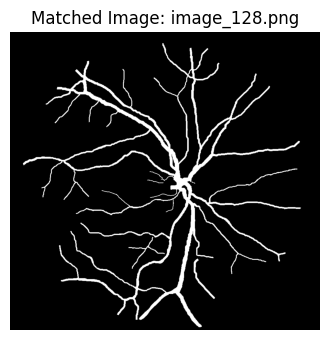

In [ ]:
match_image_hash(test_path, csv_path)
